In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('sh_data.csv')
data.sample(5).head(5)

,Unnamed: 0,Text,Language
1492,1133,ಪ್ರಾರಂಭಿಸಲು ಇದು ಅತ್ಯುತ್ತಮ ವೀಡಿಯೊ ಆದ್ದರಿಂದ ಆಶಾದ...,Kannada
62,391,എനിക്ക് സമാനമായത് വാങ്ങാൻ താൽപ്പര്യമുണ്ടെന്ന് ...,Malayalam
769,968,"இல்லை, இல்லை.",Tamil
1206,1703,దీన్ని దిల్లీ ముఖ్యమంత్రి అరవింద్‌ కేజ్రీవాల్‌...,Telugu
1386,836,"ஓ, இது கிட்டத்தட்ட பைத்தியம் போன்றது.",Tamil


In [3]:
data = data.drop(['Unnamed: 0'], axis = 1)

In [4]:
X = data['Text']
X.sample(5)

420          ನೀವು ಅದನ್ನು ಪುನರಾವರ್ತಿಸಲು ಮನಸ್ಸು ಮಾಡುತ್ತೀರಾ?
1430    ഇത് ചെയ്യാൻ എന്നെ സഹായിക്കാമോ എന്ന് ഞാൻ ചിന്തി...
933     കാരണം നമ്മുടെ പത്രങ്ങൾ ഒക്കെ ഇപ്പോഴും യൂണികോഡ്...
495     അടുത്ത വാചകം പരാതിപ്പെടാൻ കഴിയില്ല ആരെങ്കിലും ...
1162                                            இப்போதே.
Name: Text, dtype: object

In [5]:
y = data['Language']
y.sample(5)

1203      Kannada
820       Kannada
350        Telugu
1976    Malayalam
1214    Malayalam
Name: Language, dtype: object

In [6]:
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state = 42)

In [7]:
vec = TfidfVectorizer(ngram_range=(1,3),analyzer='char') 
        #TfidfVectorizer

In [8]:
model = pipeline.Pipeline([
    ('vectorizer',vec),
    ('clf', LogisticRegression())
])

In [9]:
model.fit(x_train,y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(analyzer='char', ngram_range=(1, 3))),
                ('clf', LogisticRegression())])

In [10]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
accuracy

1.0

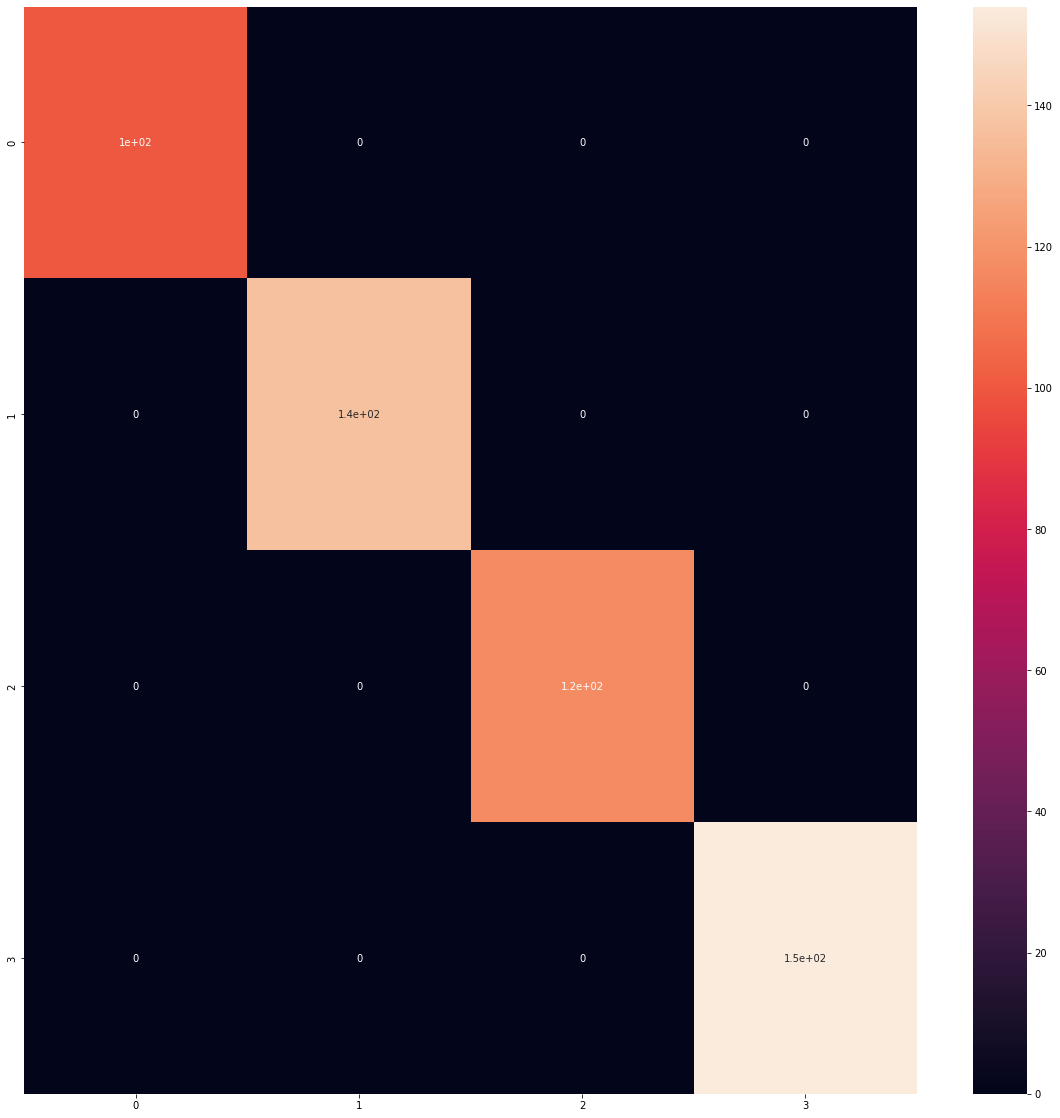

In [11]:
plt.figure(figsize=(20,20))
sns.heatmap(cm,annot=True)
plt.show()

In [12]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

     Kannada       1.00      1.00      1.00       100
   Malayalam       1.00      1.00      1.00       137
       Tamil       1.00      1.00      1.00       117
      Telugu       1.00      1.00      1.00       154

    accuracy                           1.00       508
   macro avg       1.00      1.00      1.00       508
weighted avg       1.00      1.00      1.00       508



In [13]:
def pred(t):
    l = model.predict([t])
    print('Language is:',l)

In [18]:
pred("నేను అను సర్వనామము")

Language is: ['Telugu']


In [15]:
pred("ಬೆಳಗ್ಗೆ")

Language is: ['Kannada']


In [16]:
pred("உங்களை சந்தித்ததில் மகிழ்ச்சி")

Language is: ['Tamil']


In [17]:
pred("ഇന്ന് നിങ്ങൾക്കെങ്ങനെയുണ്ട്")

Language is: ['Malayalam']
